In [1]:
import warnings

warnings.filterwarnings(
    'ignore', '.*This code is currently UNREVIEWED, use with caution!.*'
)

In [2]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from gw_signal_tools import latexparams
from gw_signal_tools.waveform import get_wf_generator, WaveformDerivative

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


In [3]:
import lalsimulation.gwsignal.core.parameter_conventions as pc

# -- Make sure mass1 and mass2 are not in default_dict
pc.default_dict.pop('mass1', None)
pc.default_dict.pop('mass2', None);

In [4]:
from gw_signal_tools import PLOT_STYLE_SHEET

plt.style.use(PLOT_STYLE_SHEET)

# Derivative Testing

The purpose of this notebook is to provide proof (well, at least evidence) that the derivative calculations conducted by ``WaveformDerivative`` work well.

In [5]:
f_min = 20.0 * u.Hz
f_max = 1024.0 * u.Hz

wf_params = {
    # 'total_mass': 100.*u.solMass,
    # 'total_mass': 50.*u.solMass,
    # 'chirp_mass': 50.*u.solMass,
    'chirp_mass': 30.0 * u.solMass,
    'mass_ratio': 0.42 * u.dimensionless_unscaled,
    'deltaT': 1.0 / 2048.0 * u.s,
    'f22_start': f_min,
    'deltaF': 2**-8 * u.Hz,
    'f_max': f_max,
    'f22_ref': 20.0 * u.Hz,
    'phi_ref': 0.0 * u.rad,
    'distance': 440.0 * u.Mpc,
    'inclination': 0.0 * u.rad,
    'condition': 0,
}


# Define the approximant
approximant = 'IMRPhenomXPHM'
# approximant = 'SEOBNRv4'

# Initialize the generator
wf_generator = get_wf_generator(approximant)

In [ ]:
# param_to_vary = 'total_mass'
param_to_vary = 'chirp_mass'
# param_to_vary = 'mass_ratio'

In [7]:
deriv_gw_signal = WaveformDerivative(
    wf_params,
    param_to_vary,
    wf_generator,
    convergence_check='diff_norm',
    # convergence_threshold=0.005,
    # convergence_threshold=0.0001,  # Testing if relative difference becomes smaller when doing this -> yes it does; but computation time also increases significantly
    # start_step_size=1e-3,
    # start_step_size=1e-8,  # For fun
    deriv_routine='gw_signal_tools',
)

num_deriv_gw_signal, info_dict_gw_signal = deriv_gw_signal(), deriv_gw_signal.info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [8]:
info_dict_gw_signal

DerivInfo(deriv_formula='five_point', final_convergence_val=<Quantity 0.00018874>, final_set_of_step_sizes=array([1.e-02, 5.e-03, 1.e-03, 5.e-04, 1.e-04, 5.e-05, 1.e-05,
       5.e-06, 1.e-06]), final_step_size=np.float64(0.0005), is_exact_deriv=False, norm_squared=<Quantity 9.13605236e-43 1 / solMass2>, number_of_refinements=0)

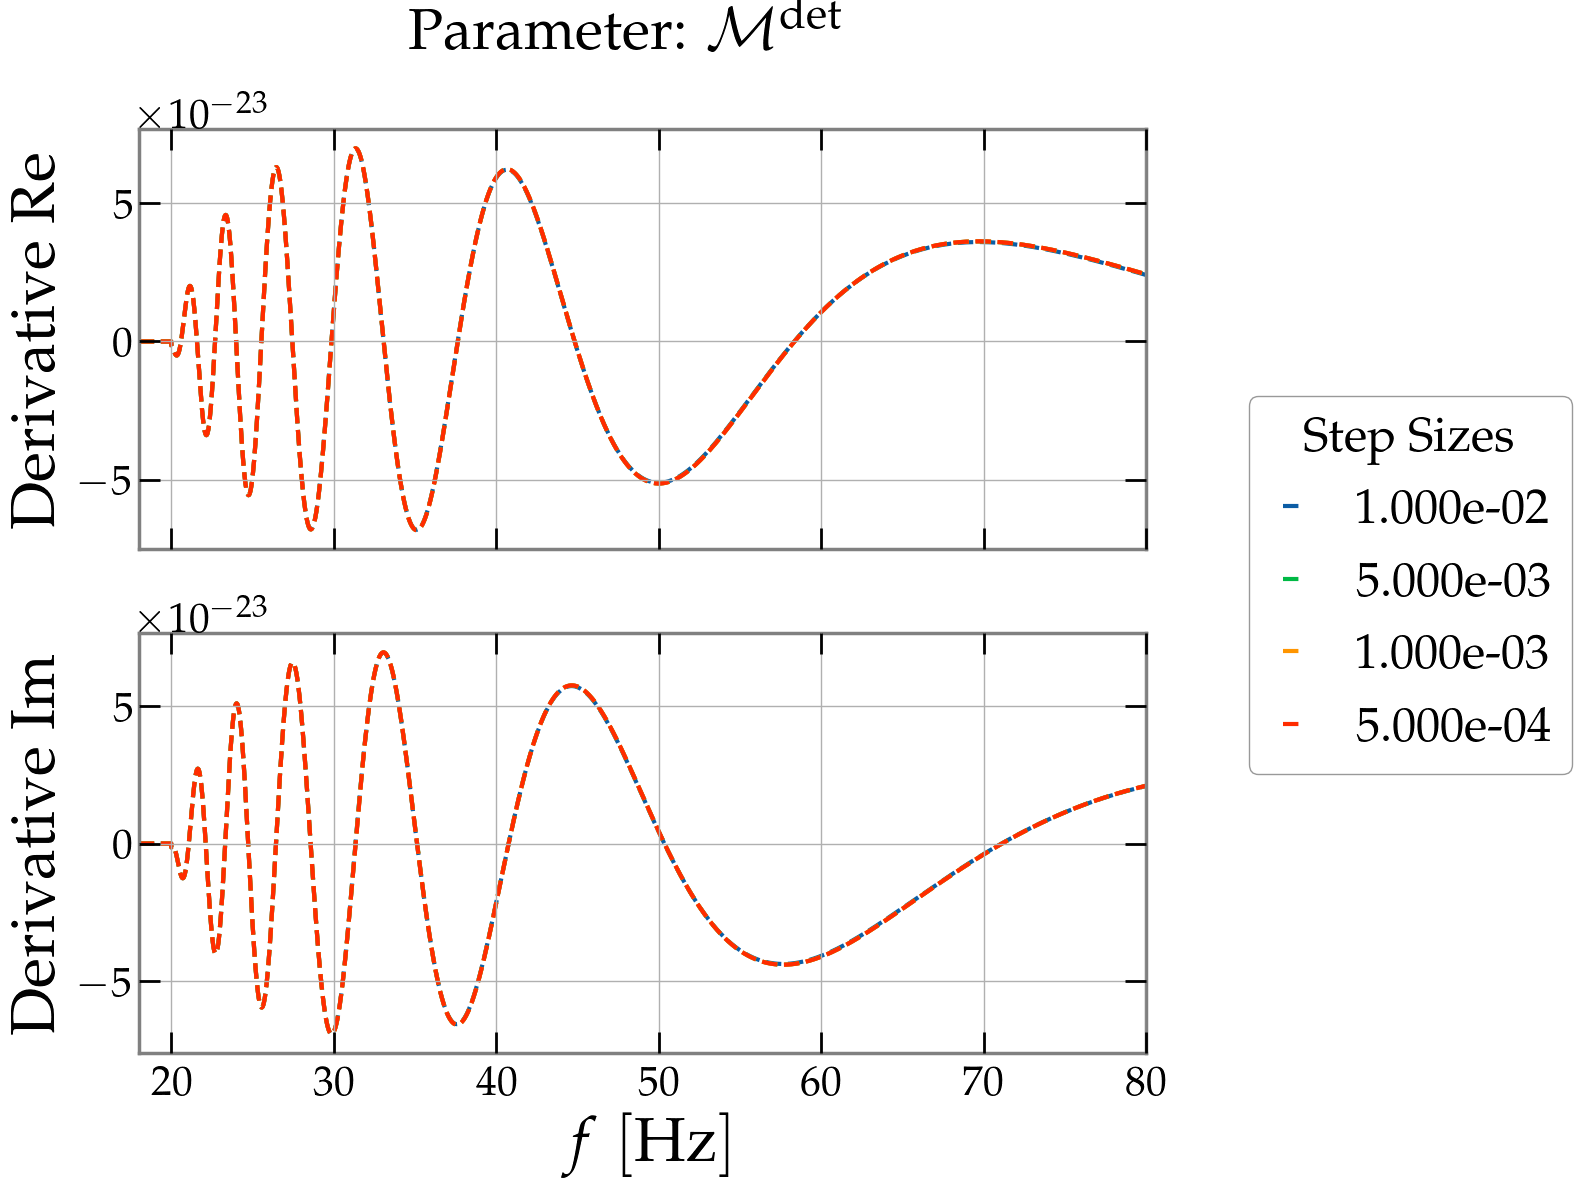

In [9]:
ax = deriv_gw_signal.convergence_plot()

plt.xlim([18, 80])
plt.xlabel(r'$f \; [\mathrm{Hz}]$')

plt.show()

Convergence/stability is demonstrated here very well

In [10]:
deriv_nd_tools = WaveformDerivative(
    wf_params, param_to_vary, wf_generator, deriv_routine='numdifftools'
)

num_deriv_nd_tools, info_dict_nd_tools = deriv_nd_tools(), deriv_nd_tools.info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [11]:
info_dict_nd_tools

DerivInfo(error_estimate=<FrequencySeries([0., 0., 0., ..., 0., 0., 0.]
                 unit=Unit("s strain / solMass"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.00390625 Hz>,
                 epoch=None,
                 name=None,
                 channel=None)>, f_value=<FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j,
                  0.+0.j]
                 unit=Unit("s strain"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.00390625 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=-256.0>,
                 name='hplus',
                 channel=None)>, final_step=array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
       0.00810209, 0.00810209], shape=(262145,)), index=array([1310725, 1310726, 1310727, ..., 1572867, 1572868,
       1572869], shape=(262145,)), is_exact_deriv=False)

Problem: fairly frequently, bounds of allowed parameter ranges are reached

In [12]:
deriv_nd_tools_2 = WaveformDerivative(
    wf_params, param_to_vary, wf_generator, deriv_routine='amplitude_phase'
)

num_deriv_nd_tools_2, info_dict_nd_tools_2 = (
    deriv_nd_tools_2(),
    deriv_nd_tools_2.info,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [13]:
info_dict_nd_tools_2

DerivInfo(abs=DerivInfo(error_estimate=<FrequencySeries([0., 0., 0., ..., 0., 0., 0.]
                 unit=Unit("s strain / solMass"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.00390625 Hz>,
                 epoch=None,
                 name=None,
                 channel=None)>, f_value=array([0., 0., 0., ..., 0., 0., 0.], shape=(262145,)), final_step=array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
       0.00810209, 0.00810209], shape=(262145,)), index=array([1310725, 1310726, 1310727, ..., 1572867, 1572868,
       1572869], shape=(262145,)), is_exact_deriv=False), is_exact_deriv=False, phase=DerivInfo(error_estimate=<FrequencySeries([0., 0., 0., ..., 0., 0., 0.]
                 unit=Unit("s strain / solMass"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.00390625 Hz>,
                 epoch=None,
                 name=None,
                 channel=None)>, f_value=array([ 0.        ,  0.        ,  0.        , ..., 25

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:648: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


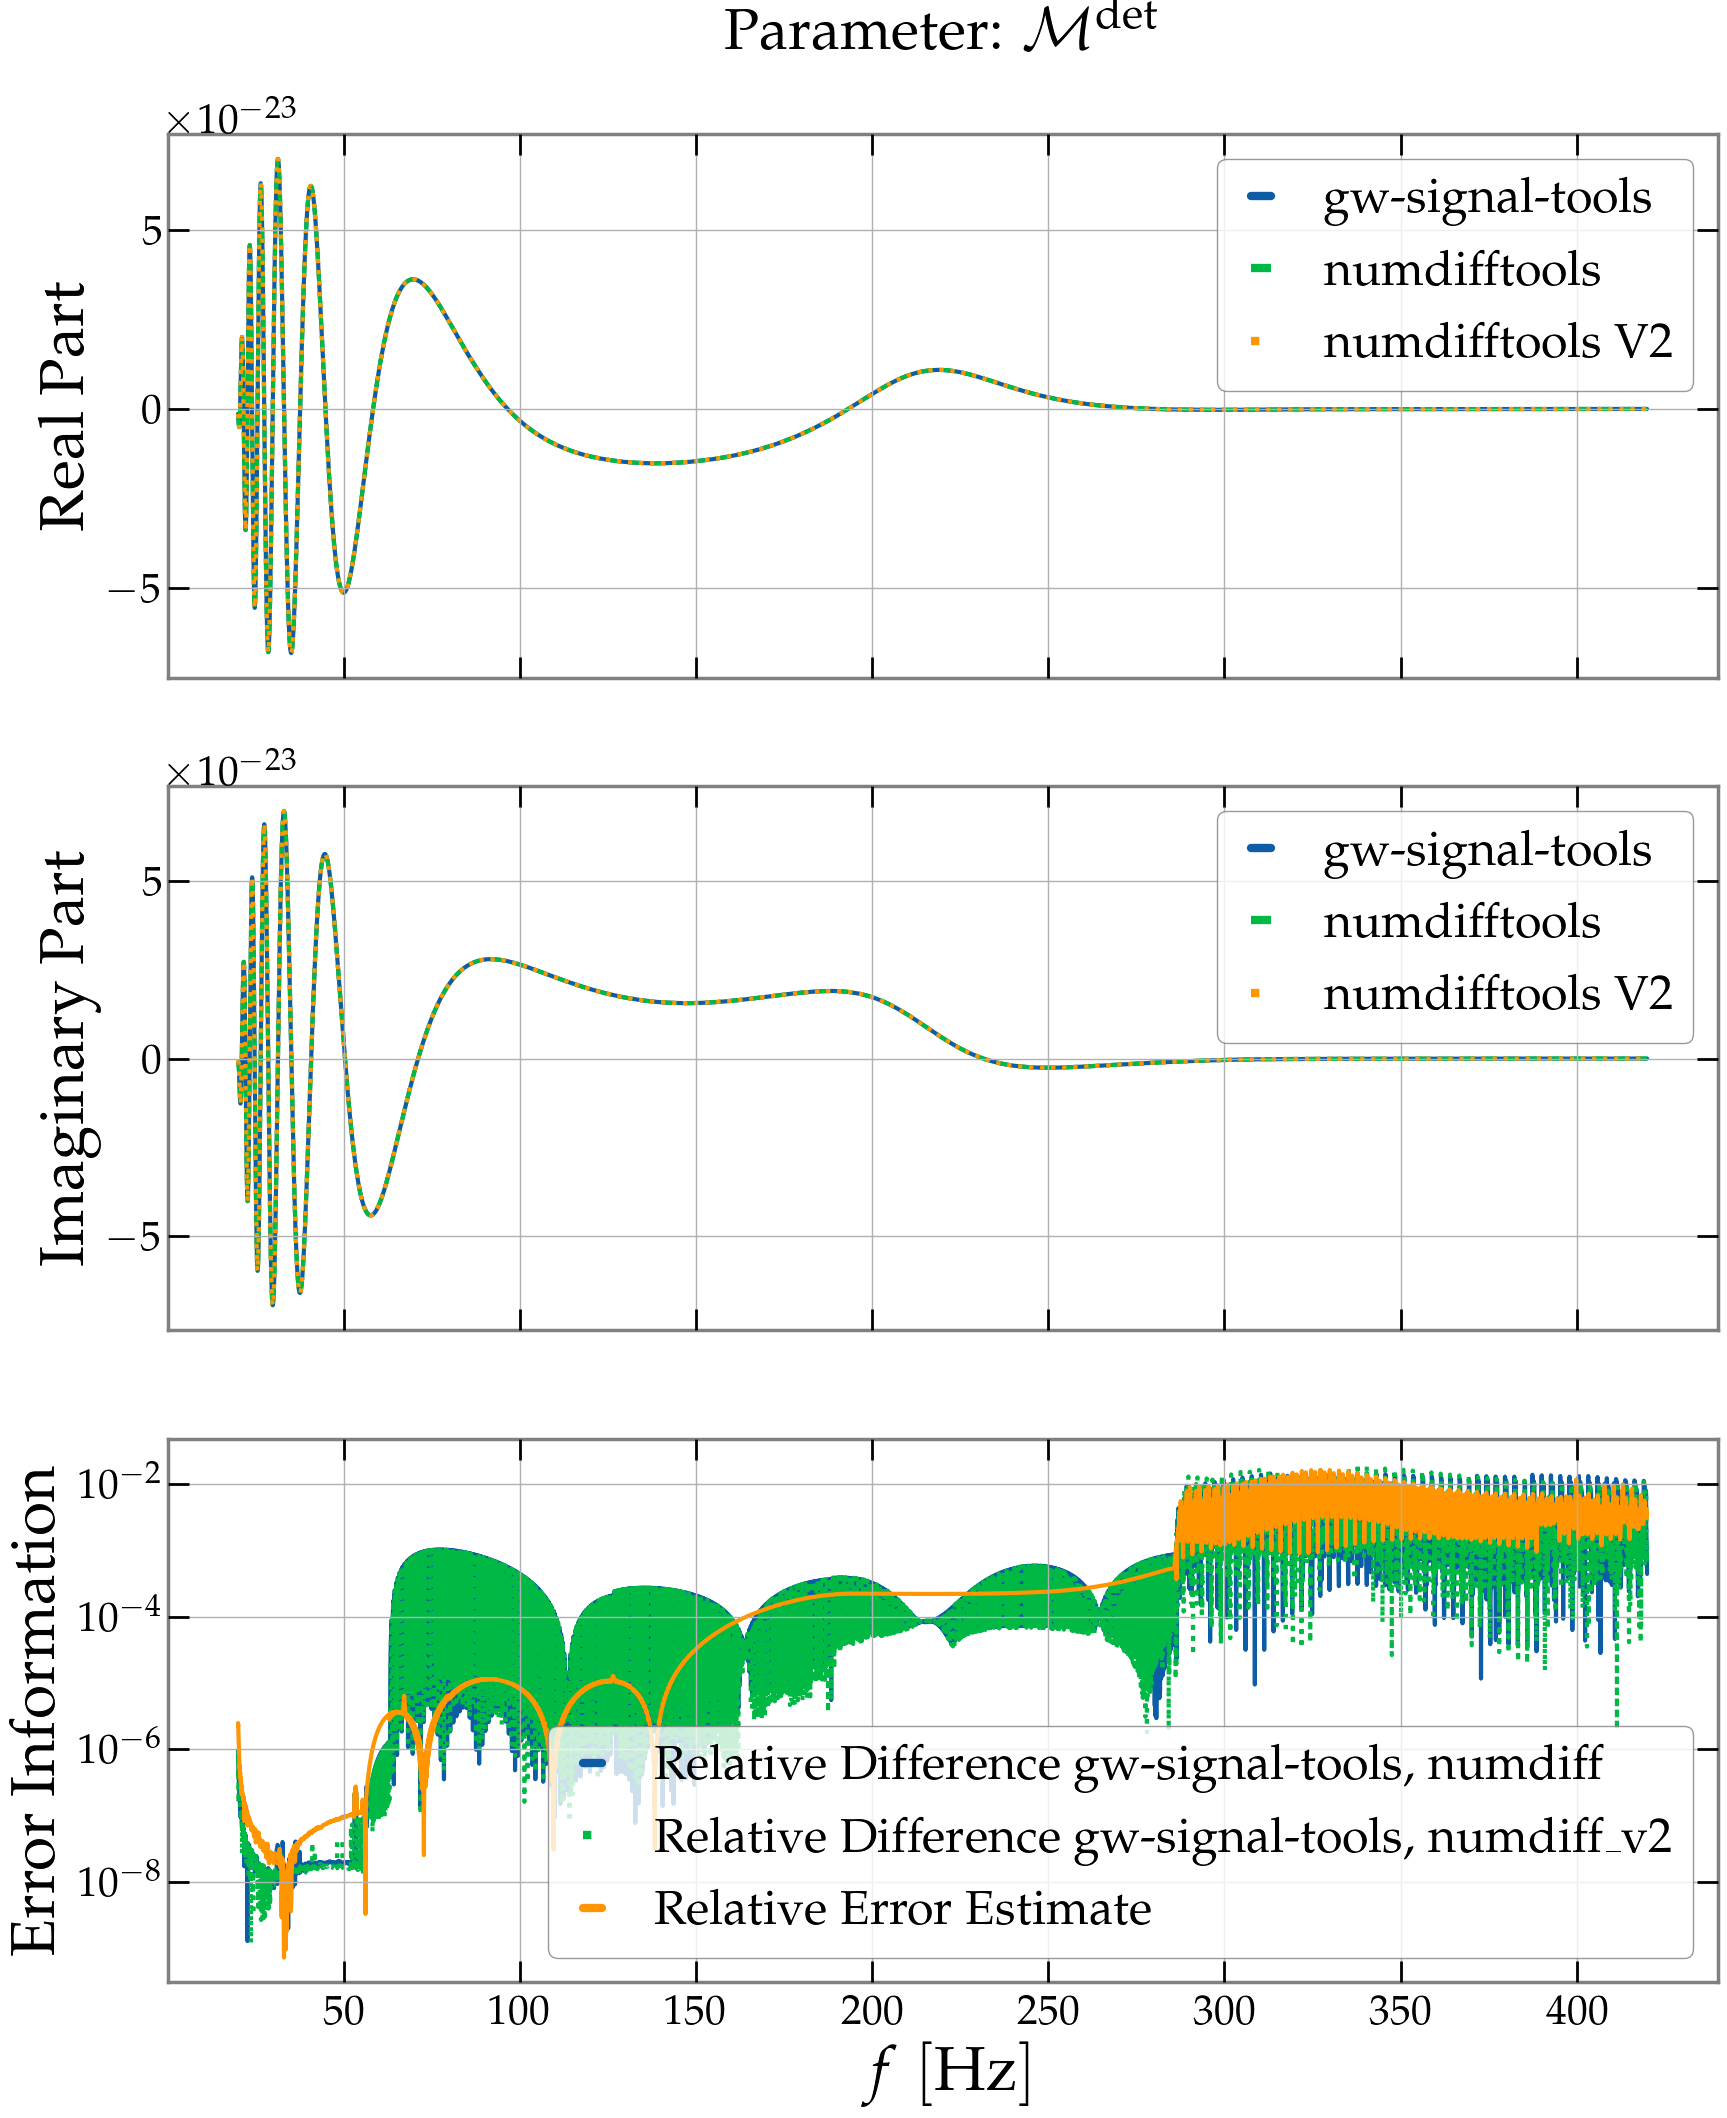

In [14]:
# f_range=[f_min, f_max]
# f_range=[f_min, 60. * u.Hz]
# f_range=[f_min, 200. * u.Hz]
f_range = [f_min, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0,].plot(
    num_deriv_gw_signal.crop(start=f_range[0], end=f_range[1]).real,
    label='gw-signal-tools',
)
ax[0,].plot(
    num_deriv_nd_tools.crop(start=f_range[0], end=f_range[1]).real,
    '--',
    label='numdifftools',
)
ax[0,].plot(
    num_deriv_nd_tools_2.crop(start=f_range[0], end=f_range[1]).real,
    ':',
    label='numdifftools V2',
)


ax[1,].plot(
    num_deriv_gw_signal.crop(start=f_range[0], end=f_range[1]).imag,
    label='gw-signal-tools',
)
ax[1,].plot(
    num_deriv_nd_tools.crop(start=f_range[0], end=f_range[1]).imag,
    '--',
    label='numdifftools',
)
ax[1,].plot(
    num_deriv_nd_tools_2.crop(start=f_range[0], end=f_range[1]).imag,
    ':',
    label='numdifftools V2',
)


ax[2,].plot(
    ((num_deriv_gw_signal - num_deriv_nd_tools) / num_deriv_nd_tools)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    label='Relative Difference gw-signal-tools, numdiff',
)
ax[2,].plot(
    ((num_deriv_gw_signal - num_deriv_nd_tools_2) / num_deriv_nd_tools_2)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    ':',
    label='Relative Difference gw-signal-tools, numdiff_v2',
)

ax[2,].plot(
    (deriv_nd_tools.error_estimate / num_deriv_nd_tools)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    label='Relative Error Estimate',
)


# title = param_to_vary
# title += f' ({par})' if ((par:=latexparams.get(param_to_vary, None)) is not None) else ''
# title += ' derivative'
title = f'Parameter: {latexparams.get(param_to_vary, param_to_vary)}'
# fig.suptitle(title)
ax[0,].set_title(title + '\n')

ax[0,].set_ylabel('Real Part')
ax[0,].legend()  # (ncols=3)

ax[1,].set_ylabel('Imaginary Part')
ax[1,].legend()  # (ncols=3)

ax[2,].set_xlabel(r'$f \; [\mathrm{Hz}]$')
ax[2,].set_yscale('log')
ax[2,].set_ylabel('Error Information')
ax[2,].legend()

plt.show()

Relative difference on scale of error estimate is good, right? Should mean we get equal to numdifftools result that we are on scale of its error, i.e. the deviation need not come from our own implementation

In [15]:
from gw_signal_tools.waveform import norm

In [16]:
f_range = None  # No restriction here

fisher1 = norm(num_deriv_gw_signal, f_range=f_range)
fisher2 = norm(num_deriv_nd_tools, f_range=f_range)

In [17]:
print(fisher1, fisher2, abs((fisher1 - fisher2) / fisher1))

9.558269903661992e-22 1 / solMass 9.558166668882495e-22 1 / solMass 1.080057170771298e-05


Agreement is good, only real deviations (around 1%) occur for extreme situations like very small symmetric mass ratio, otherwise usually around 1e-4 or even lower.

## Analytical Derivatives Verification

As another test of the implementation, we can utilize that certain parameters have derivatives that are known analytically.
By comparing those results with those of our numerical routine(s), we can get an idea of their accuracy (in this case a direct assessment of their accuracy, not just coming from the consistency of different routines).
Granted, the parameter impact is usually less complicated than for the other intrinsic parameters, where the analytical dependence is usually not fully known, but this is nonetheless a good test.

### Phase and Time

In [18]:
waveform = wf_generator(wf_params)
ana_deriv_time = waveform * -1j * 2.0 * np.pi * waveform.frequencies
ana_deriv_phase = waveform * 2j

deriv_phase = WaveformDerivative(wf_params, 'phi_ref', wf_generator)

num_deriv_phase, info_dict_phase = deriv_phase(), deriv_phase.info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


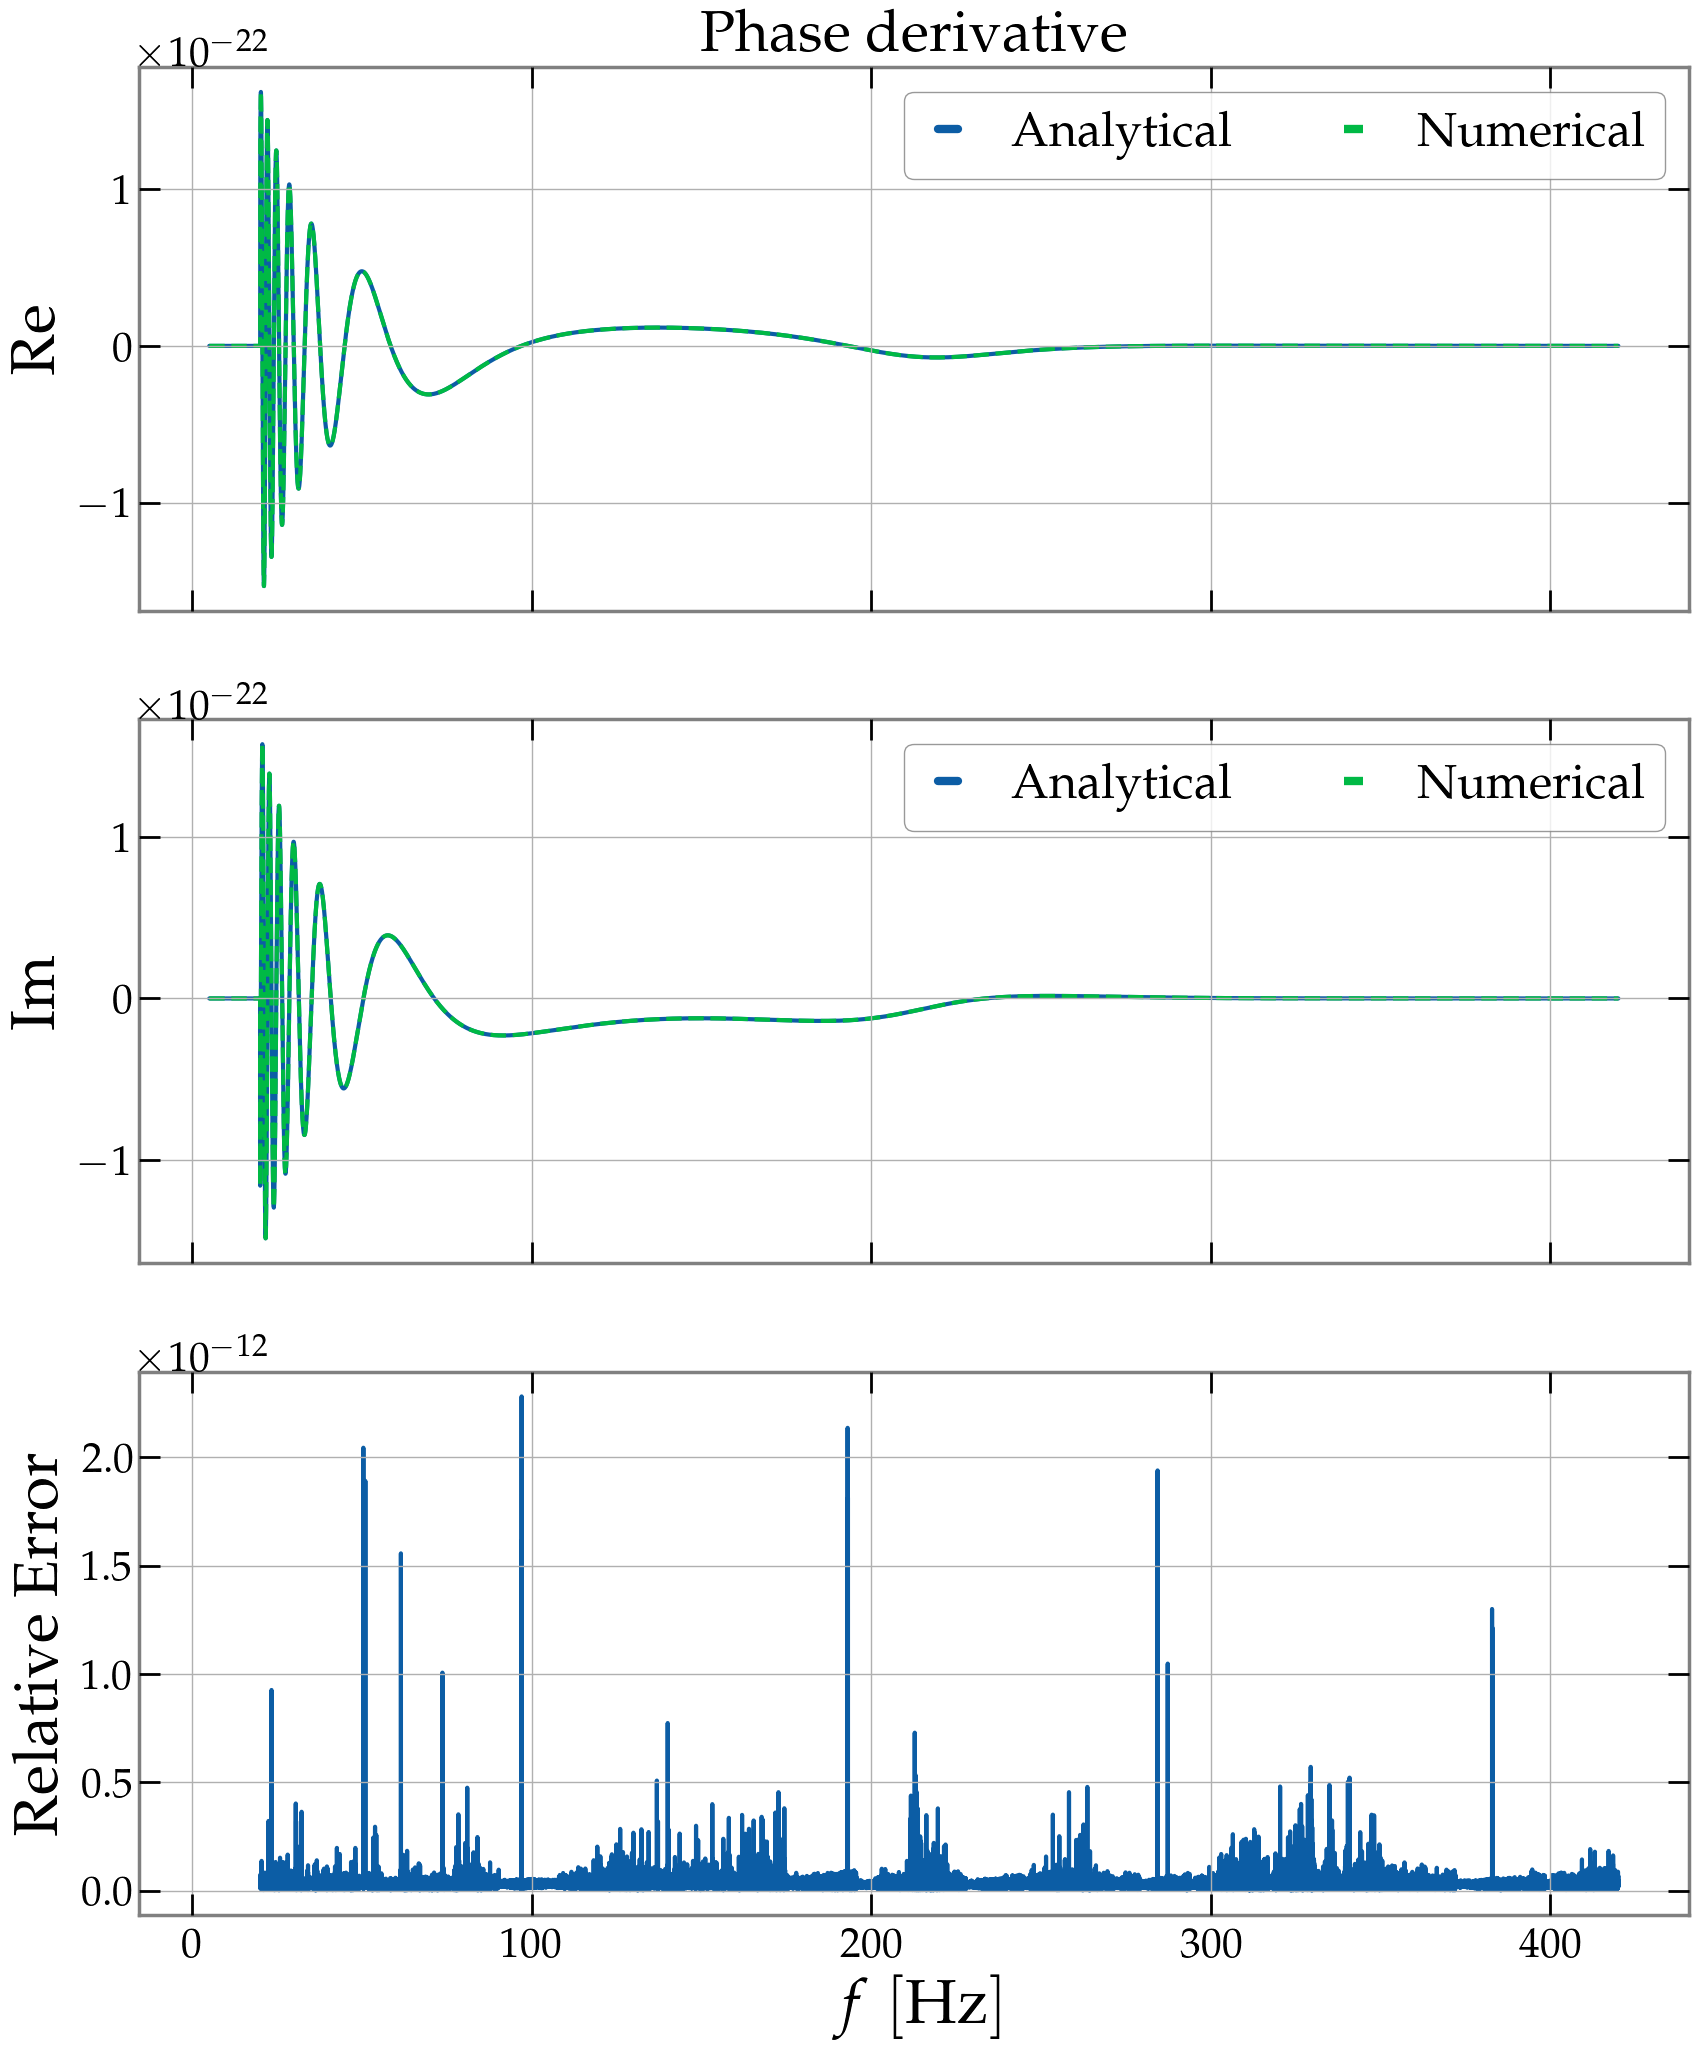

In [19]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0].plot(
    ana_deriv_phase.crop(start=f_range[0], end=f_range[1]).real, label='Analytical'
)
ax[0].plot(
    num_deriv_phase.crop(start=f_range[0], end=f_range[1]).real, '--', label='Numerical'
)


ax[1].plot(
    ana_deriv_phase.crop(start=f_range[0], end=f_range[1]).imag, label='Analytical'
)
ax[1].plot(
    num_deriv_phase.crop(start=f_range[0], end=f_range[1]).imag, '--', label='Numerical'
)


ax[2].plot(
    ((ana_deriv_phase - num_deriv_phase) / ana_deriv_phase)
    .abs()
    .crop(start=f_range[0], end=f_range[1])
)


ax[0].legend(ncols=2)
ax[1].legend(ncols=2)
ax[0].set_title('Phase derivative')
ax[0].set_ylabel('Re')
ax[1].set_ylabel('Im')
ax[2].set_ylabel('Relative Error')
ax[2].set_xlabel(r'$f \; [\mathrm{Hz}]$')
# plt.xlim(5, 100)

plt.show()

Very good agreement. Note, however, that this might not be the case if higher harmonics have a significant impact or if the binary is precessing.

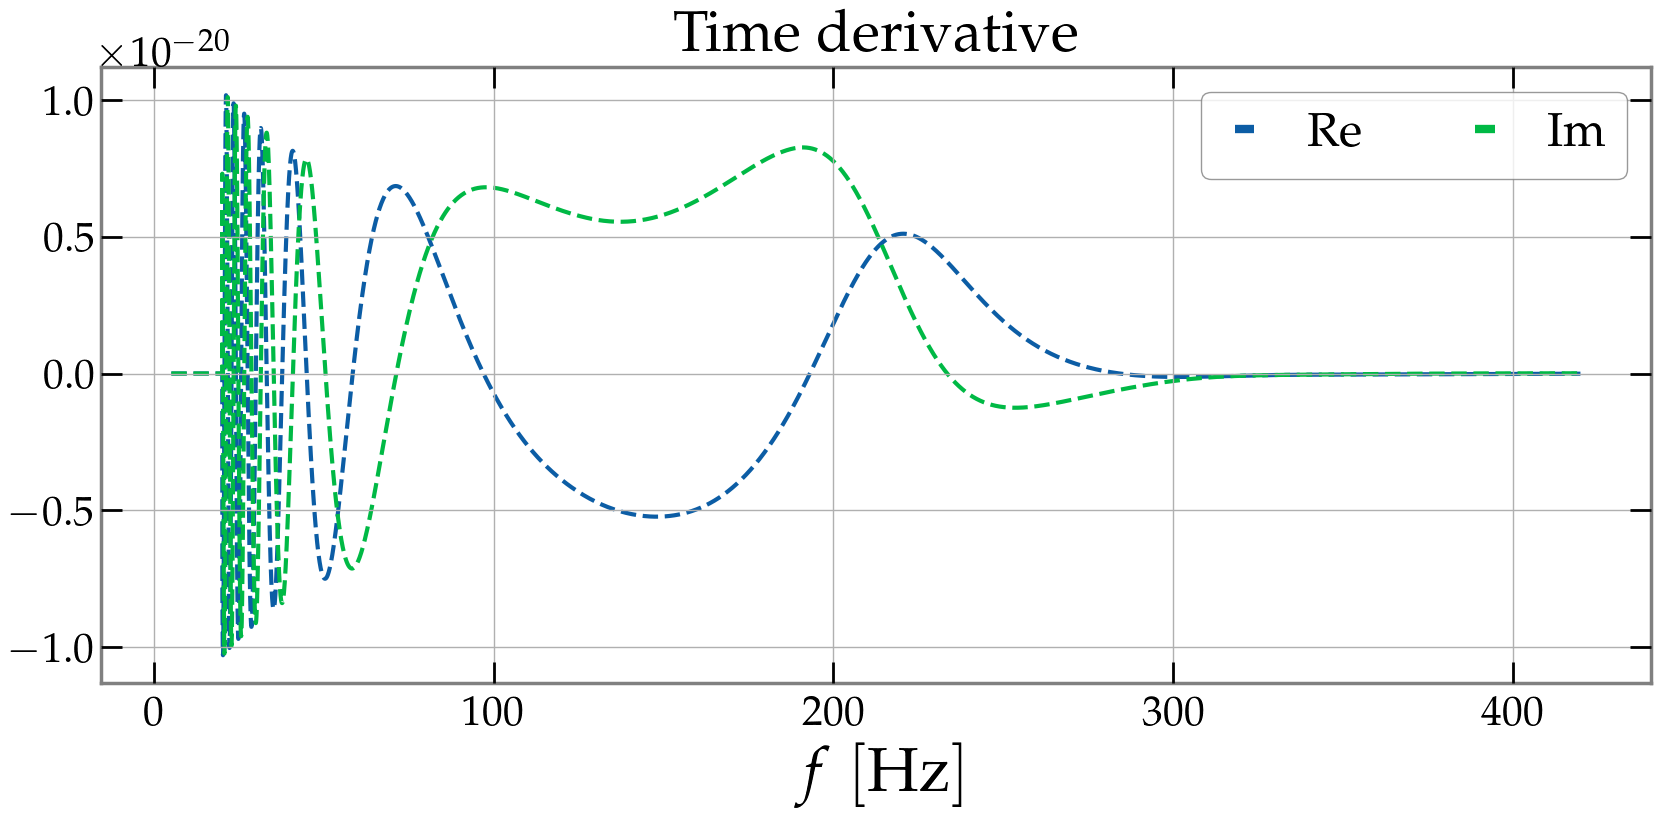

In [20]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(ana_deriv_time.crop(start=f_range[0], end=f_range[1]).real, '--', label='Re')
ax.plot(ana_deriv_time.crop(start=f_range[0], end=f_range[1]).imag, '--', label='Im')

ax.set_title('Time derivative')
ax.set_xlabel(r'$f \; [\mathrm{Hz}]$')
ax.legend(ncols=2)
# plt.xlim(5, 100)

plt.show()

### Luminosity Distance

For the distance, we can calculate a analytical derivative by noticing that

$$h(f, D_L) = h(f, 1) / D_L$$

which implies

$$\frac{\partial h(f, D_L)}{\partial D_L} = h(f, 1) \frac{\partial 1/D_L}{\partial D_L} = h(f, 1) (-1 / D_L^2) = - h(f, D_L) / D_L .$$

In [21]:
# We rename distance parameter in the new generator so that derivative
# routine does not recognize it and uses analytical derivative
def dist_deriv_gen(wf_params):
    _wf_params = wf_params.copy()
    _wf_params['distance'] = _wf_params.pop('dist')

    return wf_generator(_wf_params)


dist_deriv_params = wf_params.copy()
dist_deriv_params.pop('distance')
dist_deriv_params['dist'] = wf_params['distance']

deriv_distance = WaveformDerivative(dist_deriv_params, 'dist', dist_deriv_gen)

num_deriv_distance, info_dict_distance = deriv_distance(), deriv_distance.info

ana_deriv_distance = -wf_generator(wf_params) / wf_params['distance']

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


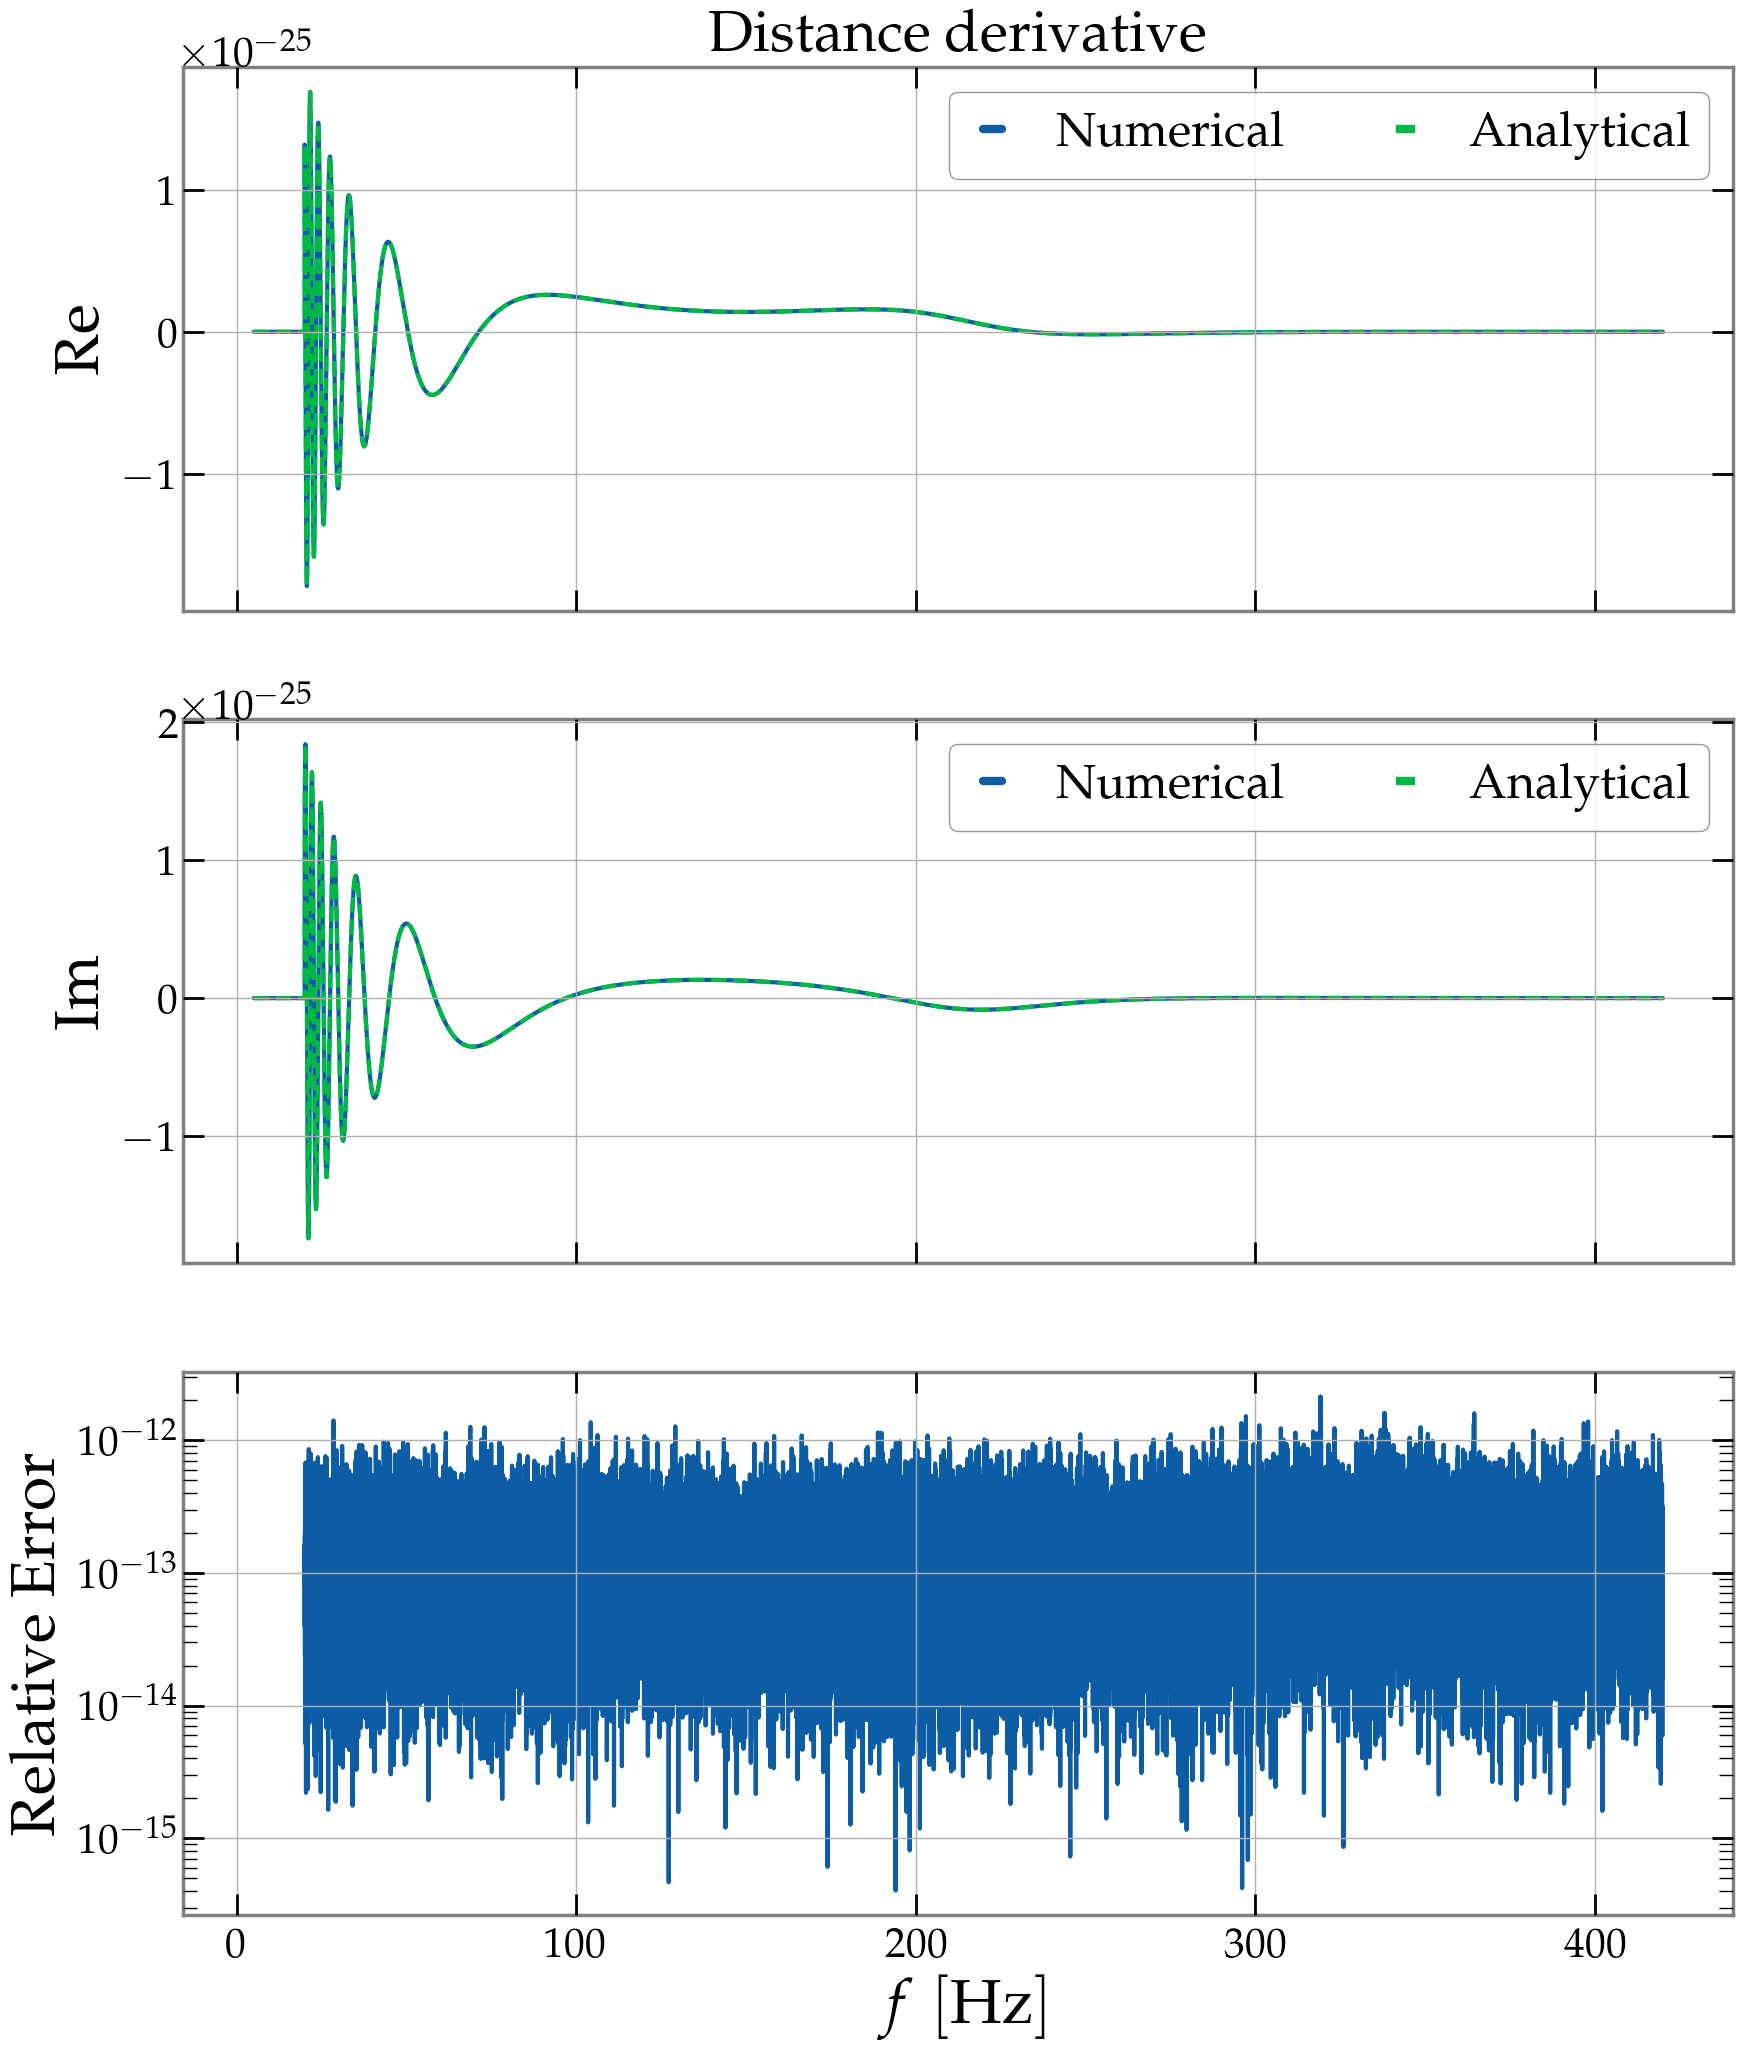

In [22]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0].plot(
    num_deriv_distance.crop(start=f_range[0], end=f_range[1]).real, label='Numerical'
)
ax[0].plot(
    ana_deriv_distance.crop(start=f_range[0], end=f_range[1]).real,
    '--',
    label='Analytical',
)


ax[1].plot(
    num_deriv_distance.crop(start=f_range[0], end=f_range[1]).imag, label='Numerical'
)
ax[1].plot(
    ana_deriv_distance.crop(start=f_range[0], end=f_range[1]).imag,
    '--',
    label='Analytical',
)


ax[2].plot(
    ((ana_deriv_distance - num_deriv_distance) / ana_deriv_distance)
    .abs()
    .crop(start=f_range[0], end=f_range[1])
)


ax[0].set_title('Distance derivative')
ax[0].legend(ncols=2)
ax[1].legend(ncols=2)
ax[2].set_yscale('log')
ax[0].set_ylabel('Re')
ax[1].set_ylabel('Im')
ax[2].set_ylabel('Relative Error')
ax[2].set_xlabel(r'$f \; [\mathrm{Hz}]$')
# plt.xlim(5, 100)

plt.show()

Very good agreement